# Summer Olympics Data Analysis Assignment

### Reading Data from csv file

In [1]:
import pandas as pd
import numpy as np

data=pd.read_csv('./summer.csv')

### DataSet Description

In [2]:
data.head()

,Year,City,Sport,Discipline,Athlete,Country,Gender,Event,Medal
0,1896,Athens,Aquatics,Swimming,"HAJOS, Alfred",HUN,Men,100M Freestyle,Gold
1,1896,Athens,Aquatics,Swimming,"HERSCHMANN, Otto",AUT,Men,100M Freestyle,Silver
2,1896,Athens,Aquatics,Swimming,"DRIVAS, Dimitrios",GRE,Men,100M Freestyle For Sailors,Bronze
3,1896,Athens,Aquatics,Swimming,"MALOKINIS, Ioannis",GRE,Men,100M Freestyle For Sailors,Gold
4,1896,Athens,Aquatics,Swimming,"CHASAPIS, Spiridon",GRE,Men,100M Freestyle For Sailors,Silver


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31165 entries, 0 to 31164
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Year        31165 non-null  int64 
 1   City        31165 non-null  object
 2   Sport       31165 non-null  object
 3   Discipline  31165 non-null  object
 4   Athlete     31165 non-null  object
 5   Country     31161 non-null  object
 6   Gender      31165 non-null  object
 7   Event       31165 non-null  object
 8   Medal       31165 non-null  object
dtypes: int64(1), object(8)
memory usage: 2.1+ MB


## Questions Related to above DataSet

### 1. In how many cities Summer Olympics is held so far?

In [6]:
data['City'].nunique()     # Numbers of Cities

22

In [8]:
print(data['City'].unique())      # Different Cities

['Athens' 'Paris' 'St Louis' 'London' 'Stockholm' 'Antwerp' 'Amsterdam'
 'Los Angeles' 'Berlin' 'Helsinki' 'Melbourne / Stockholm' 'Rome' 'Tokyo'
 'Mexico' 'Munich' 'Montreal' 'Moscow' 'Seoul' 'Barcelona' 'Atlanta'
 'Sydney' 'Beijing']


### 2. Which sport is having most number of Gold Medals so far? (Top 5)

In [13]:
sp=[]

for sport in data['Sport'].unique():
    sp.append([sport,data[data['Sport']==sport]['Medal'].value_counts()['Gold']])
print('----------Top 5 Sports---------')
print(pd.DataFrame(sp,columns=['Sport','Gold Medals']).sort_values(by='Gold Medals',ascending=False).head())  

----------Top 5 Sports---------
         Sport  Gold Medals
0     Aquatics         1421
1    Athletics         1215
17      Rowing          890
4   Gymnastics          820
3      Fencing          552


-------------------------Bar Graph-------------------------
AxesSubplot(0.125,0.125;0.775x0.755)


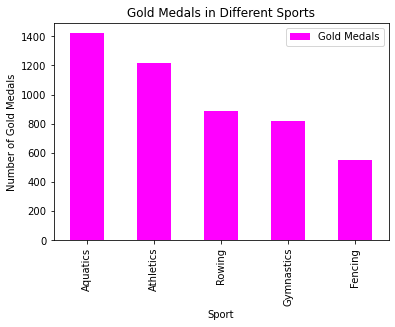

In [16]:
print('-------------------------Bar Graph-------------------------')
print(pd.DataFrame(sp,columns=['Sport','Gold Medals']).sort_values(by='Gold Medals',ascending=False).head().plot(x='Sport',y='Gold Medals',kind='bar',title='Gold Medals in Different Sports',ylabel='Number of Gold Medals',colormap='spring'))

### 3. Which sport is having most number of medals so far? (Top 5)

In [17]:
sp=[]

for sport in data['Sport'].unique():
    sp.append([sport,data[data['Sport']==sport]['Medal'].count()])
print('----------Top 5 Sports---------')
print(pd.DataFrame(sp,columns=['Sport','Medals']).sort_values(by='Medals',ascending=False).head())

----------Top 5 Sports---------
         Sport  Medals
0     Aquatics    4170
1    Athletics    3638
17      Rowing    2667
4   Gymnastics    2307
3      Fencing    1613


-------------------------Bar Graph-------------------------
AxesSubplot(0.125,0.125;0.775x0.755)


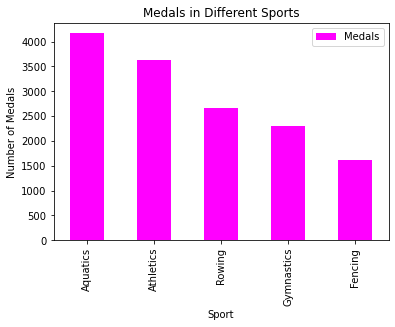

In [18]:
print('-------------------------Bar Graph-------------------------')
print(pd.DataFrame(sp,columns=['Sport','Medals']).sort_values(by='Medals',ascending=False).head().plot(x='Sport',y='Medals',kind='bar',title='Medals in Different Sports',ylabel='Number of Medals',colormap='spring'))

### 4. Which player has won most number of medals? (Top 5)

In [19]:
print('----------Top 5 Athletes---------')
print(data.groupby('Athlete').count()['Medal'].sort_values(ascending = False).head())

----------Top 5 Athletes---------
Athlete
PHELPS, Michael         22
LATYNINA, Larisa        18
ANDRIANOV, Nikolay      15
MANGIAROTTI, Edoardo    13
ONO, Takashi            13
Name: Medal, dtype: int64


-------------------------Bar Graph-------------------------
AxesSubplot(0.125,0.125;0.775x0.755)


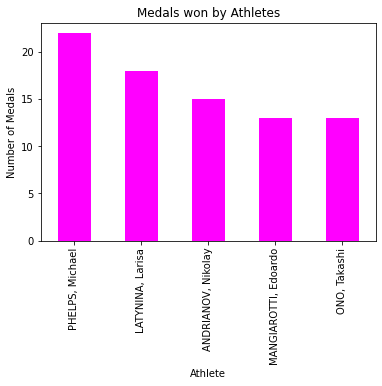

In [21]:
print('-------------------------Bar Graph-------------------------')
print(data.groupby('Athlete').count()['Medal'].sort_values(ascending = False).head().plot(x='Athlete',y='Medal',kind='bar',title='Medals won by Athletes',ylabel='Number of Medals',colormap='spring'))

### 5. Which player has won most number Gold Medals of medals? (Top 5)

In [22]:
ply=[]

for player in data[data['Medal']=='Gold']['Athlete'].unique():
    ply.append([player,data[data['Athlete']==player]['Medal'].value_counts()['Gold']])
print('----------Top 5 Athletes---------')    
print(pd.DataFrame(ply,columns=['Athlete','Gold Medals']).sort_values(by='Gold Medals',ascending=False).head())

----------Top 5 Athletes---------
               Athlete  Gold Medals
6851   PHELPS, Michael           18
3320       SPITZ, Mark            9
2714  LATYNINA, Larisa            9
4630       LEWIS, Carl            9
907       NURMI, Paavo            9


-------------------------Bar Graph-------------------------
AxesSubplot(0.125,0.125;0.775x0.755)


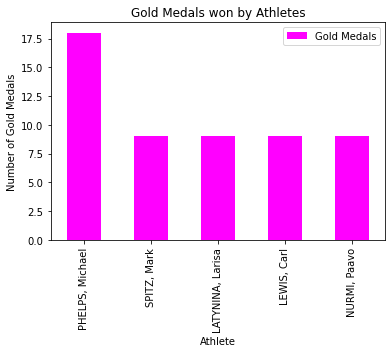

In [23]:
print('-------------------------Bar Graph-------------------------')
print(pd.DataFrame(ply,columns=['Athlete','Gold Medals']).sort_values(by='Gold Medals',ascending=False).head().plot(x='Athlete',y='Gold Medals',kind='bar',title='Gold Medals won by Athletes',ylabel='Number of Gold Medals',colormap='spring'))

### 6. In which year India won first Gold Medal in Summer Olympics?

In [30]:
data_india=data[(data['Country']=='IND')&(data['Medal']=='Gold')]

print('--------------Year--------------')
print('             ',data_india['Year'].iloc[1])
print('--------------------------------')

--------------Year--------------
              1928
--------------------------------


In [31]:
print('----------------Description----------------')
data_india.head(1)

----------------Description----------------


,Year,City,Sport,Discipline,Athlete,Country,Gender,Event,Medal
5512,1928,Amsterdam,Hockey,Hockey,"ALLEN, Richard James",IND,Men,Hockey,Gold


### 7. Which event is most popular in terms on number of players? (Top 5)

In [37]:
p=[]  

for event in data['Event'].unique():
    p.append([event,data[data['Event']==event]['Athlete'].count()])
print('---------------------Top 5 Events---------------------')        
print(pd.DataFrame(p,columns=['Event','Popular(Number of players)']).sort_values(by='Popular(Number of players)',ascending=False).head())

---------------------Top 5 Events---------------------
                Event  Popular(Number of players)
80           Football                        1497
176            Hockey                        1422
138  Team Competition                        1147
327        Basketball                        1012
337          Handball                         973


-------------------------Bar Graph-------------------------
AxesSubplot(0.125,0.125;0.775x0.755)


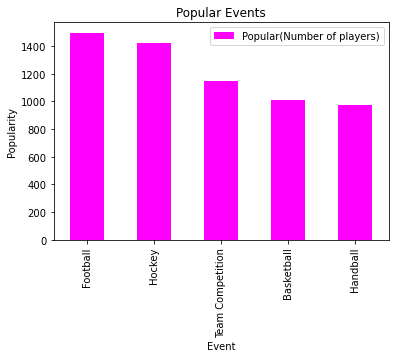

In [38]:
print('-------------------------Bar Graph-------------------------')
print(pd.DataFrame(p,columns=['Event','Popular(Number of players)']).sort_values(by='Popular(Number of players)',ascending=False).head().plot(x='Event',y='Popular(Number of players)',kind='bar',title='Popular Events',ylabel='Popularity',colormap='spring'))

### 8. Which sport is having most female Gold Medalists? (Top 5)

In [42]:
st=[]

for sport in data[data['Gender']=='Women']['Sport'].unique():
    st.append([sport,data[(data['Gender']=='Women') & (data['Medal']=='Gold')]['Sport'].value_counts()[sport]])
print('---------------------Top 5 Sports---------------------') 
print(pd.DataFrame(st,columns=['Sport','Gold Medals by Women Athlete']).sort_values(by='Gold Medals by Women Athlete',ascending=False).head())

---------------------Top 5 Sports---------------------
         Sport  Gold Medals by Women Athlete
4     Aquatics                           589
8    Athletics                           389
9   Gymnastics                           268
14      Rowing                           217
11  Volleyball                           166


-------------------------Bar Graph-------------------------
AxesSubplot(0.125,0.125;0.775x0.755)


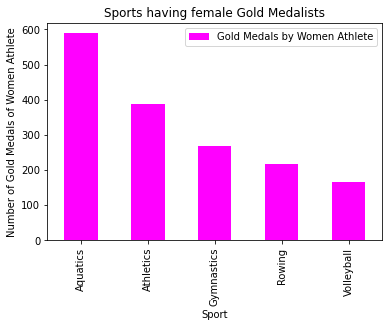

In [44]:
print('-------------------------Bar Graph-------------------------')
print(pd.DataFrame(st,columns=['Sport','Gold Medals by Women Athlete']).sort_values(by='Gold Medals by Women Athlete',ascending=False).head().plot(x='Sport',y='Gold Medals by Women Athlete',kind='bar',title='Sports having female Gold Medalists',ylabel='Number of Gold Medals of Women Athlete',colormap='spring'))